### Building a CNN using Keras
#### Dataset Fashion MNIST

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

2022-03-21 17:28:56.227225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-21 17:28:56.227269: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Data Preparation

In [2]:
x = pd.read_csv("./Dataset/fashion-mnist.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0   # normalize pixels to 0-1 range
y = X_[:,0]
print(X.shape,y.shape) #10 classes

(10000, 784) (10000,)


In [3]:
np.unique(y,return_counts=True) #Well Balanced 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [4]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)


(10000, 28, 28, 1) (10000, 10)


In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [6]:
X_train[0].shape

(28, 28, 1)

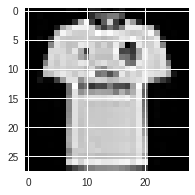

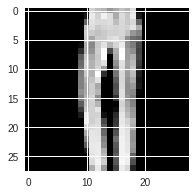

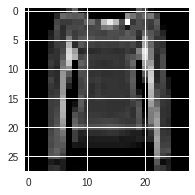

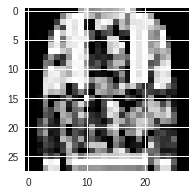

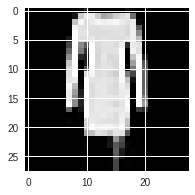

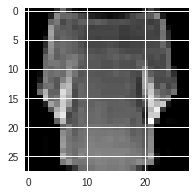

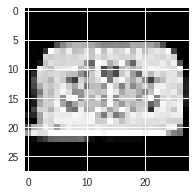

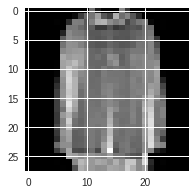

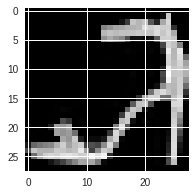

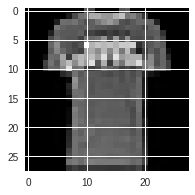

In [7]:
for i in range(10):
    plt.figure(figsize=(5,3))
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

## CNN Model

In [8]:
model = Sequential()
## here we passed 32 different filters of size(3,3) and input size of each image
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
## there is a parameter padding="same" in Convolution2D to keep same dimensions
model.add(Convolution2D(64,(3,3),activation='relu')) # 64 filter of size 3,3
model.add(Dropout(0.25)) # dropout layer: drop 25% of neurons randomly.
model.add(MaxPooling2D(2,2))  # 2,2 filter size
model.add(Convolution2D(32,(5,5),activation='relu')) # 32 filters of size: 5,5(bigger filter_size)
model.add(Convolution2D(8,(5,5),activation='relu'))  # 8 filters of size: 5,5
# model.add(MaxPooling2D(2,2))  # this is not always required.
model.add(Flatten()) # this is not a layer. It is just flattens the input.
model.add(Dense(10,activation='softmax'))  # output layer

2022-03-21 17:29:07.978808: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-21 17:29:07.980310: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-21 17:29:07.980500: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (harsh): /proc/driver/nvidia/version does not exist
2022-03-21 17:29:07.986097: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           6408      
                                                        

In [10]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

2022-03-21 17:29:08.395577: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25088000 exceeds 10% of free system memory.


Epoch 1/20


2022-03-21 17:29:09.869978: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22151168 exceeds 10% of free system memory.
2022-03-21 17:29:09.971716: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37748736 exceeds 10% of free system memory.
2022-03-21 17:29:10.060978: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37748736 exceeds 10% of free system memory.
2022-03-21 17:29:10.169333: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 9437184 exceeds 10% of free system memory.


32/32 [==============================] - 40s 1s/step - loss: 1.8825 - accuracy: 0.2855 - val_loss: 1.2243 - val_accuracy: 0.5765
Epoch 2/20
32/32 [==============================] - 25s 770ms/step - loss: 0.8670 - accuracy: 0.6714 - val_loss: 0.7726 - val_accuracy: 0.7315
Epoch 3/20
32/32 [==============================] - 25s 786ms/step - loss: 0.6823 - accuracy: 0.7366 - val_loss: 0.6940 - val_accuracy: 0.7455
Epoch 4/20
32/32 [==============================] - 25s 774ms/step - loss: 0.6115 - accuracy: 0.7680 - val_loss: 0.6040 - val_accuracy: 0.7760
Epoch 5/20
32/32 [==============================] - 25s 768ms/step - loss: 0.5715 - accuracy: 0.7843 - val_loss: 0.5670 - val_accuracy: 0.8100
Epoch 6/20
32/32 [==============================] - 27s 839ms/step - loss: 0.5276 - accuracy: 0.8060 - val_loss: 0.5418 - val_accuracy: 0.8090
Epoch 7/20
32/32 [==============================] - 25s 792ms/step - loss: 0.4995 - accuracy: 0.8166 - val_loss: 0.5206 - val_accuracy: 0.8235
Epoch 8/20
32

- It took around 4 mins for 20epochs for 10,000 examples only. Try on GPU or TPU with real trian set=> 60,000 examples on google collab.

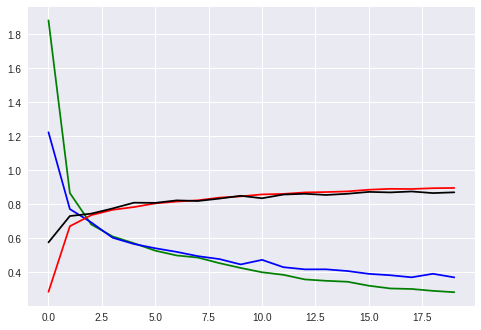

In [16]:
plt.figure(0)
plt.plot(hist.history['loss'],'g', label="training loss")
plt.plot(hist.history['val_loss'],'b', label="validation loss")

plt.plot(hist.history['accuracy'],'r', label="training accuracy")
plt.plot(hist.history['val_accuracy'],'black', label="validation accuracy")
plt.show()


In [18]:
h = hist.history
train_ix = np.argmin(h['loss'])
print("Training set has miniimum loss of: ",h['loss'][train_ix],", at index: ", train_ix)

val_ix = np.argmin(h['val_loss'])
print("Validation set has minimum loss of: ",h['val_loss'][val_ix],", at index: ",val_ix)

train_ix = np.argmax(h['accuracy'])
print("Training set has maximum accuracy of: ",h['accuracy'][train_ix],", at index: ", train_ix)

val_ix = np.argmax(h['val_accuracy'])
print("Validation set has maximum accuracy of: ",h['val_accuracy'][val_ix],", at index: ",val_ix)

Training set has miniimum loss of:  0.2832552492618561 , at index:  19
Validation set has minimum loss of:  0.3705107569694519 , at index:  19
Training set has maximum accuracy of:  0.8966249823570251 , at index:  19
Validation set has maximum accuracy of:  0.8759999871253967 , at index:  17


### CNN can still give much results with some better architecture.

## We can use dropouts in MLP also. Try it later on..